## Graph Packages

 1. `networkx (https://networkx.github.io/)` for graph data structure
   - provides interface for creation and manipulation of graphs
   - implements all sorts of graph algorithms
   - exports into common graph languages 
   
   
 2. `pyvis (https://pyvis.readthedocs.io/)` for graph visualisation
   - reads directly from `networkx` objects
   - interactive mode and extensive dynamics and colouring options, exports as HTML
 
Additional packages:

 - `pydot` python interface and translation to GraphViz and its DOT language
 - `bokeh` supports a similar range as matplotlib but with interactive plots

In [1]:
import networkx as nx
from pyvis.network import Network

import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pickle

# Constructing the graph for the WROTE_TO relation

 - read in the pickled relations instances, aka. sender-receiver tuples 

In [2]:
with open("WROTE_TO.pkl", "rb") as handle:
    rel_tuples = pickle.load(handle)
print("Number of relation instances:\t", len(rel_tuples))
print("Number of unique instances:\t", len(set(rel_tuples)), "\t(= number of edges in graph)")
print("Number of unique persons:\t", len({s for s, r in rel_tuples} | {r for s, r in rel_tuples}), 
      "\t(= number of nodes in graph)")

Number of relation instances:	 65663
Number of unique instances:	 24412 	(= number of edges in graph)
Number of unique persons:	 11011 	(= number of nodes in graph)


## construct a (directed) graph using networkx.Graph (networkx.DiGraph)

In [3]:
# rel_tuples = rel_tuples[:1000]

G = nx.Graph()
G.add_edges_from(rel_tuples)

DG = nx.DiGraph()
DG.add_edges_from(rel_tuples)

## downsample the graph, taking a random subset of 500 edges

(graph is too large for effective visualisation otherwise)

In [4]:
rand_inds = np.random.choice(len(rel_tuples), 500, replace=False)
rand_inds.sort()
downsampled_tuples = [rel_tuples[i] for i in rand_inds]
# downsampled_nodes = list(set([rel_tuples[i][0] for i in rand_inds] + [rel_tuples[i][1] for i in rand_inds]))

small_G = nx.Graph()
small_G.add_edges_from(downsampled_tuples)
small_DG = nx.DiGraph()
small_DG.add_edges_from(downsampled_tuples)

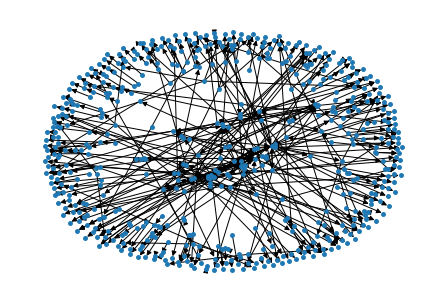

In [11]:
%matplotlib inline
nx.draw(small_DG, node_size=15)#, edgelist=downsampled_tuples, nodelist=downsampled_nodes)

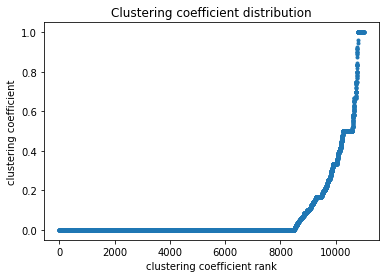

In [55]:
%matplotlib inline
cluster_coeffs = sorted(nx.algorithms.cluster.clustering(DG).items(), key=lambda tup: tup[1], reverse=False)

# cluster_coeffs = cluster_coeffs[:100]


plt.plot(list(range(1, len(cluster_coeffs)+1)), [t[1] for t in cluster_coeffs], '.')
plt.title("Clustering coefficient distribution")
plt.xlabel("clustering coefficient rank")
plt.ylabel("clustering coefficient")
plt.show()

In [7]:
print("Number of connected components: ", nx.algorithms.components.number_connected_components(G))

Number of connected components:  695
